## Explonatory Data Analysis (EDA)

Build a data pipeline in Python that downloads data using the urls given below, trains a random forest model on the training dataset using sklearn and scores the model on the test dataset.

In [5]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno

%matplotlib inline

As a first step, we have to download the data from Github. 

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Description about the columns.

1. PassengerId : This is a unique number assigned to passengers, this has no significance on our analysis.
2. Survived : This is our target variable. The values are basically binary values of 0 or 1.
3. PClass : This has three values indicating which class the passengers were.
4. Name : Name of the passenger has no signifinace on our analysis.
5. Sex : Another Categorical and important variable. 
6. Age : Age could be of great significance in our analysis. 
7. SibSp : Siblings and spouses travelling with passengers.
8. Parch : Number of parents and children travelling.
9. Ticket : Just another ticket number, not of big significance.
10. Cabin : The cabin in which our passengers were travelling.
11. Embarked :The place where the passengers boarded the ship.

Now we will look at the test_data and see how they look like. 

In [8]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The columns look the same as train data, with the exception of Survived. Our target variable.

#### Variable Analysis and Selection.

The variables that are not of much interest to us are.

1. PassengerID
2. Name
3. Ticket 

For the rest of variables we have to do some analysis before making sure whether they are needed or not.

Let us drop the above 3 variables from our Training and Test dataset.

In [9]:
# Dropping variable which are not that much important for our prediction.
train_data.drop('Name', inplace=True, axis=1)
train_data.drop('Ticket', inplace=True, axis=1)
train_data.drop('PassengerId', inplace=True, axis=1)

# Similarly removing from our Test Data set.
test_data.drop('Name', inplace=True, axis=1)
test_data.drop('Ticket', inplace=True, axis=1)
test_data.drop('PassengerId', inplace=True, axis=1)


In [10]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [11]:
# Let us try to describe our data set and see how our data looks like.
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Let us try to see the columns which has missing values.
train_data.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Checking the value of test_data
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From the above we can see that Age, Cabin and Embarked has missing values with Cabin having almost 80% missing values.

With this many missing values, i do not see Cabin will lead us to correct prediction.

Let us do a visualization on the missing values.

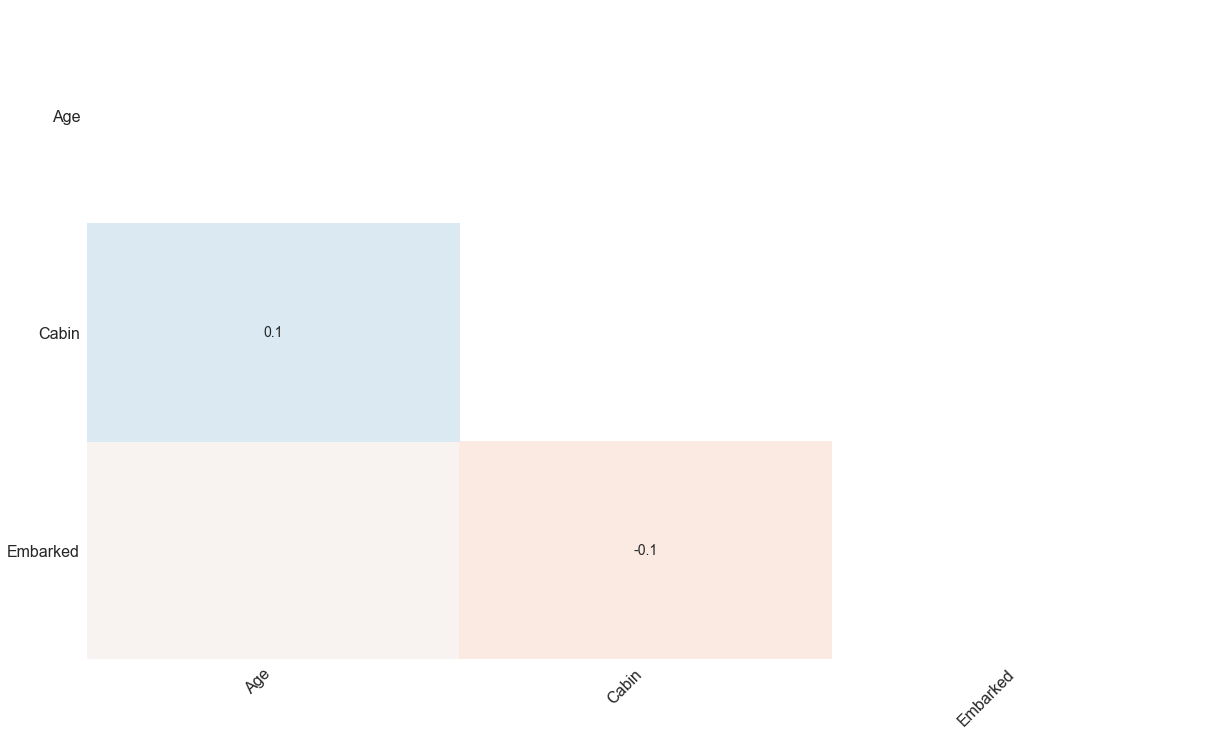

In [19]:
msno.heatmap(train_data)

Let us drop the cabin variable from both train_data and test_data.

In [21]:
train_data.drop('Cabin', inplace=True, axis=1)
# Similarly removing from our Test Data set.
test_data.drop('Cabin', inplace=True, axis=1)

#####  Variable Imputation

The two variables that needs to go through imputation are Age and Embarked.

In [25]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

The unique values for Embarked are C = Cherbourg, Q = Queenstown, S = Southampton.

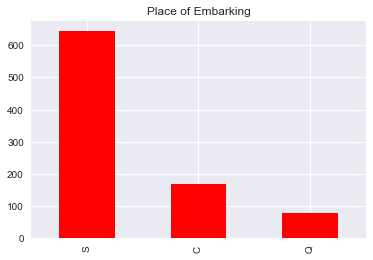

In [27]:
train_data.Embarked.value_counts().plot(kind='bar', color='red', grid=True)
plt.title("Place of Embarking");

In [31]:
train_data.groupby('Embarked').agg('mean')['Fare']
# We will see the average fares at each boarding point. 


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [32]:
train_data.Fare.agg('mean')

32.2042079685746

The Average Fare is more of less equal to Average Fare at Boarding point S. So for the missing values, we will replace it with S for Embarked.

In [35]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
# Filled with SouthAmpton.

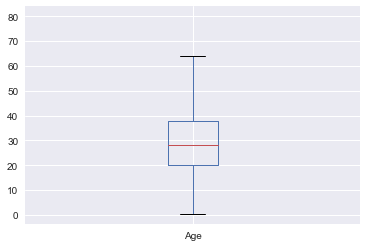

In [36]:
# For Age, lets plot and see the data for Age.
train_data.boxplot('Age')

In [37]:
train_data.isnull().sum() # making sure only Age has missing values.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

For Age Imputation we will apply the mean of the Age for our analysis.

In [43]:
mean_age = train_data['Age'].mean()
train_data['Age'].fillna(mean_age, inplace=True)


In [44]:
train_data.isnull().sum() # Cross checking to make sure all the missing values are fixed.

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Let us plot the histogram and see how the data looks like 

In [46]:
# Lastly converting all categorical variables in to numerical.

train_data['Sex'] = train_data['Sex'].replace('male', 1)
train_data['Sex'] = train_data['Sex'].replace('female', 0)
train_data['Embarked'] = train_data['Embarked'].replace('S', 0)
train_data['Embarked'] = train_data['Embarked'].replace('C', 1)
train_data['Embarked'] = train_data['Embarked'].replace('Q', 2)

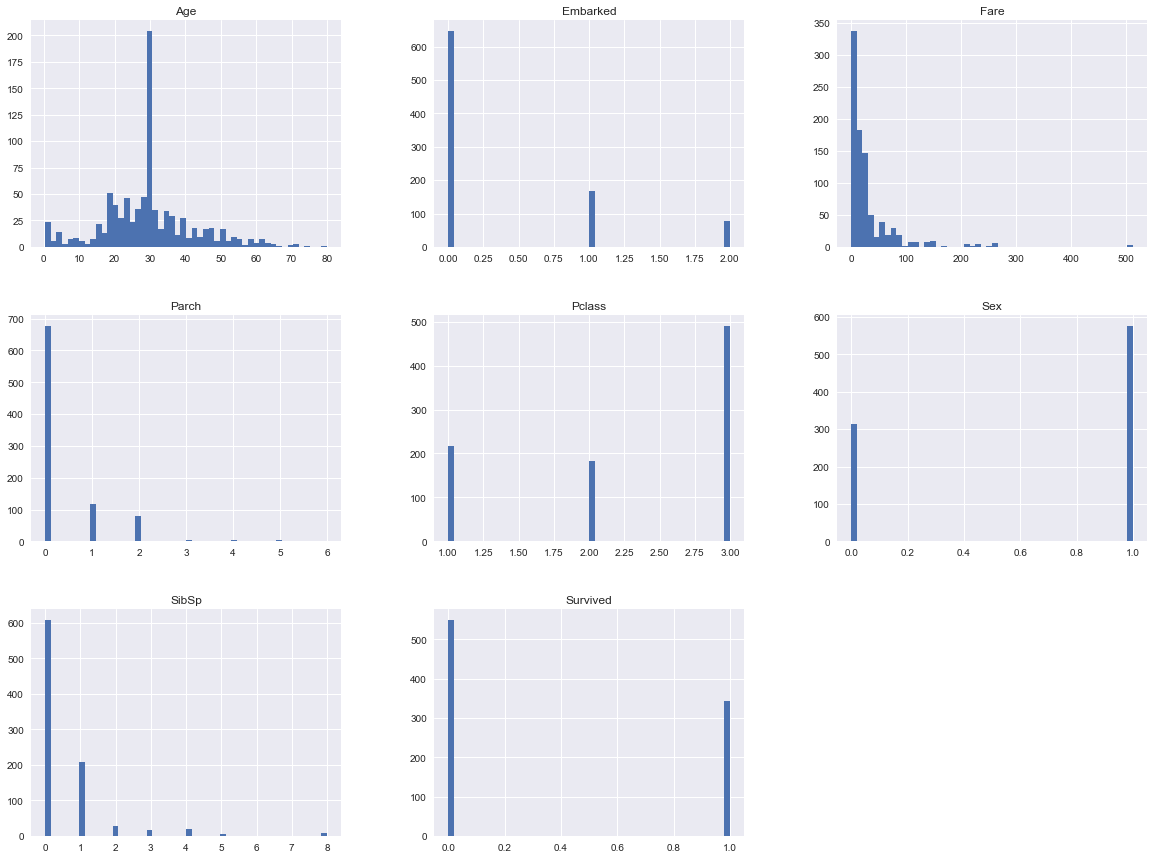

In [47]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Model Classification. 

In [48]:
# Split into dependent and independet variables
y = train_data['Survived'].values
X = train_data.drop('Survived', axis=1).values

In [50]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=38)


In [54]:
from sklearn import metrics
def display_confusion_matrix(sample_test, prediction, score=None):
    cm = metrics.confusion_matrix(sample_test, prediction)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15)
    print(metrics.classification_report(sample_test, prediction))

             precision    recall  f1-score   support

          0       0.77      0.93      0.84       100
          1       0.88      0.65      0.74        79

avg / total       0.82      0.80      0.80       179



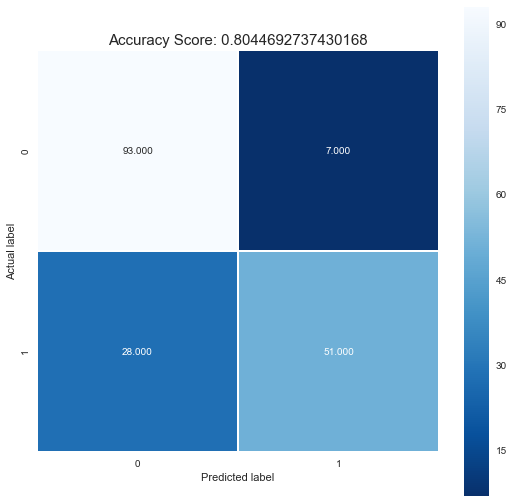

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# We will be using the Random Forrest Classifier as asked in question.
model = RandomForestClassifier(random_state=42) 
model.fit(X_train, y_train)

# Predict for test data sample
model_prediction_train = model.predict(X_test)

# Compute error between predicted data and true response and display it in confusion matrix
score = model.score(X_test, y_test)
display_confusion_matrix(y_test, model_prediction_train, score=score)

### References

https://chrisalbon.com/machine_learning/preprocessing_structured_data/impute_missing_values_with_means/